#             Coursera Capstone Project - Final Course for the IBM Data Science Certificate

In this notebook, a problem is identified and described, the choices to solve it are discussed and the steps taken in order to prepare the data and build the model are explained. 

This is the final assignment for the last course of the IBM Data Science Professional Certificate. 

# Using Machine Learning models for predicting accidents and their severity

### 1. Introduction

In the United States, around 6 Million car crashes happen every year, and more than 90 people die in car accidents every day. ([Source](https://www.driverknowledge.com/car-accident-statistics/)) These accidents can pose a significant inconvenience for cities and municipalities, as they have to deal with the consequences like traffic jams, the costs for repairing or replacing public property which was damaged, and the bad image it gives their voters. Therefore, a certain interest lies in investing into a method which could reduce the occurence of car accidents. 

Different approaches to reduce the number of accidents can be advanced driver assistance systems, awareness campaigns, or prediction systems, which can inform drivers when the probability for an accident is high in order for them to pay more attention. In this report, a dataset from Seattle containing all the accidents recorded since 2004 until present, including all types of collisions, is used to build a machine learning (ML) model which is able to predict accidents and their severity. A detailed description file of the data can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf), the most relevant attributes are also described in Chapter 2. There is a considerable amount of factors which can lead to an accident and which affect the severity of those. Therefore, the most significant factors are identified and used for building the predictive model. 


#### 1.1. The case of Seattle

The dataset, which is described in the next Chapter, contains data about accidents that occured in the city of Seattle in the United States. By having a first look at the dataset, various information can be extracted and displayed. For a first look, the number of accidents per year since 2004 are identified and shown in the plot below.

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime as dt

In [2]:
#Download the CSV file containing the accident data from the IBM cloud

!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-08 07:37:17--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  31.5MB/s   in 2.2s   

2020-10-08 07:37:20 (31.5 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
#read the csv file into a Pandas dataframe
df = pd.read_csv('Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


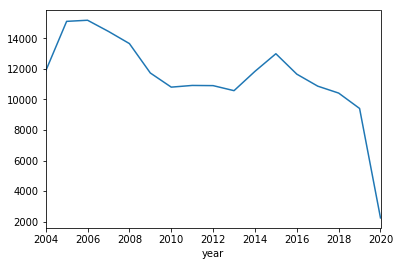

In [4]:
df_new = df
df_new['time'] = pd.to_datetime(df_new['INCDTTM'])
df_new['year'] = df_new['time'].dt.year
df_new = df_new.groupby('year', axis=0).size()
df_new.plot()


It can be seen that in the past 16 years, the number of accidents were mostly above 10000 per year. However, there is a sharp decrease in the last two years (2019 and 2020). One reason could be the fact that since the dataset is aquired in the year 2020, it does not account for the whole year. The same can be assumed for the year 2004 since data collection might have started during the year, hence the sharp increase. In order to have a clearer picture of the overall trend during the past years, the last row of the dataset, containing the accidents from the year 2020, is dropped.

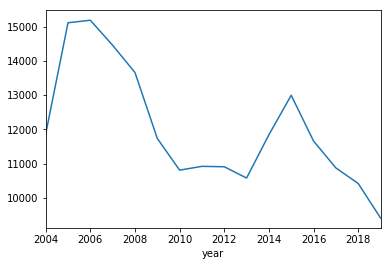

In [5]:
df_new = df_new[:-1]
df_new.plot()

This time it can be safely assumed that the number of accidents, apart from another peak around 2015, has generally decreased from around 15000 per year in 2006 to around 10000 in 2019. There can be various reasons for this significant change, however, exploring them is beyond the scope of this report.

#### 1.2. Aim and scope of the report

This report aims to identify the most relevant factors which lead to "severe" accidents, as well as to predict the possibility and severity of future accidents based on a dataset about accidents in Seattle. The general problem as well as the aim are described in the current Introduction chapter. This will be followed by the Dataset chapter, where the data and its attributes are outlined and their potential relevance explained.  Next, a Methodology chapter is provided, where the technology used to carry out the calculations and analysis is described. The results of the analysis are presented in the Results chapter, followed by a Discussion with the breakdown of the results, and finally the Conclusion chapter. 


### 2. The Dataset

As mentioned in the previous chapter, the dataset used for the ML model contains ddata of accidents that have occured in Seattle in the United States, since 2004. At the time of when this report is written in September 2020, the dataset consists of 194 673 rows and 38 columns. This means that since the starting year of the data collection (2004) until present, almost 200 000 accidents have been recorded. Furthermore, there are 38 attributes to each row, of which the relevance is identified in course of the data cleaning and preparation phase. 

#### 2.1 Attributes

The severity of accidents is represented through a "severity code", where 
- 3 means fatality 
- 2b means serious injury 
- 2 means injury 
- 1 means property damage, and 
- 0 means unknown, or no record of fatalities, injuries or property damage. 

This code is what is to be predicted by the ML model. Other columns contain specified information on the severity:
- The total number of people involved in the collision 
- The number of pedestrians involved in the collision
- The number of bicycles involved in the collision
- The number of vehicles involved inthe collision
- The number of total injuries in the collision
- The number of serious injuries in the collision
- The number of fatalities in the collision

This information can be useful to find patterns between the number of fatalities, injuries, etc. and different conditions mentioned further below. However, upon closer look at the dataset, we find that certain input or columns specified in the document are not found in the dataset aquired. By checking the input with the .unique() function for the SEVERITYCODE, it can be found that only the codes 2 (injury) and 1 (property damage) are used as input in the SEVERITYCODE. What is more, we find that the columns for injuries, serious injuries and fatalities are not in the dataset: 


In [20]:
print("Severity: ", df['SEVERITYCODE'].unique())
print(df.dtypes)

Severity:  [2 1]
SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       ob

Therefore, for this report, only two types of severities can be predicted. 

Next, there are various columns describing different internal and external conditions:
- INATTENTIONIND: Whether or not collision was due to inattention
- UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol
- WEATHER: A description of the weather conditions during the time of the collision
- ROADCOND: The condition of the road during the collision
- LIGHTCOND: The light conditions during the collision
- PEDROWNOTGRNT: Whether or not the pedestrian right of way was not granted
- SPEEDING: Whether or not speeding was a factor in the collision

These attributes will likely be very useful for the prediction model. In addition, the time and date of the incident are stored for every incident. This information could be useful to identify patterns based on the month, or even day of the week. 

Finally, a code dictionary for a closer description of the event is provided, some of which are:
- Vehicle Backing Hits Pedestrian
- Train Struck Stopped or Stalled Vehicle
- Vehicle Struck Moving Train

 to name a few. Their relevance, just like that of the other attributes, is identified during the data cleaning and preparation phase which is described in the Methodology chapter. 

#### 2.2. Irrelevant columns

The raw dataset consists of 38 columns. Studying the description sheet or the information provided in the dataset, it is clear that there are several columns which are redundant for the analysis carried out in this report, like different keys, multiple time indicators, or the report number. For the simplification of further  examination, following columns are dropped:

- LOCATION: Description of the general location of the collision, out of scope
- X and Y: Coordinates of the location, out of scope
- EXCEPTRSNCODE: no description provided
- EXCEPTRSNDESC: no description provided
- INCKEY:  A unique key for the incident, redundant 
- COLDETKEY: Secondary key for the incident, redundant
- INTKEY: Key that corresponds to the intersection associated with a collision, out of scope
- SEVERITYDESC: A detailed description of the severity of the collision, redundant
- INCDATE: The date of the incident, replaced by a datetime object
- INCDTTM: The date and time of the incident, redundant
- SDOT_COLDESC: A description of the collision corresponding to the collision code, redundant
- SDOTCOLNUM: A number given to the collision by SDOT, redundant
- SEGLANEKEY: A key for the lane segment in which the collision occurred, out of scope
- CROSSWALKKEY: A key for the crosswalk at which the collision occurred, out of scope

Given that there are attributes like INTKEY, SEGLANKEY and CROSSWALKKEY, which are keys for specific location of where the accident occured, it could be interesting to investigate if any specific crosswalks have a higher number of accidents than the average. However, that is beyond the scope of this report, therefore in this analysis those attributes are not used.  

Columns like LOCATION could be interesting to see whether certain locations are more bound to be the place of an accident. For simplification reasons, this analysis will focus on general conditions which can lead to accidents of several levels of severity, and less on the location itself. This way, the business idea has room for further expansion to other cities or areas later on. 

Given that the OBJECTID is a unique identifier of each incident or row, it is set as the index. 

In [6]:
df.drop(['EXCEPTRSNCODE','EXCEPTRSNDESC', 'INTKEY', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEGLANEKEY', 'CROSSWALKKEY', 'SDOTCOLNUM', 'SEVERITYCODE.1', 'STATUS', 'LOCATION','INCDATE','INCDTTM', 'SEVERITYDESC', 'SDOT_COLDESC', 'X', 'Y'], axis=1, inplace=True)
df.set_index('OBJECTID', inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,time,year
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,...,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,N,2013-03-27 14:54:00,2013
2,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,NaN,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,N,2006-12-20 18:55:00,2006
3,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,NaN,...,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,N,2004-11-18 10:20:00,2004
4,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,NaN,...,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,N,2013-03-29 09:26:00,2013
5,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,...,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,N,2004-01-28 08:04:00,2004


#### 2.3. Relevance of attributes to severitycode

The column to be predicted is SEVERITYCODE, or the column which represents the severity of the accident. 

Next, the relevance of different column or columns to 

In [32]:
df.drop(['X', 'Y'], axis = 1, inplace=True)

df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,time,year
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,...,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,N,2013-03-27 14:54:00,2013
2,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,NaN,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,N,2006-12-20 18:55:00,2006
3,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,NaN,...,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,N,2004-11-18 10:20:00,2004
4,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,NaN,...,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,N,2013-03-29 09:26:00,2013
5,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,...,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,N,2004-01-28 08:04:00,2004


In [26]:
df.loc[0:9, 'VEHCOUNT':'year']

,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,time,year
OBJECTID,,,,,,,,,,,,,,,,
1,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,N,2013-03-27 14:54:00,2013
2,2,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,N,2006-12-20 18:55:00,2006
3,3,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,N,2004-11-18 10:20:00,2004
4,3,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,N,2013-03-29 09:26:00,2013
5,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,N,2004-01-28 08:04:00,2004
6,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,10,Entering at angle,N,2019-04-20 17:42:00,2019
7,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,N,2008-12-09 00:00:00,2008
9,1,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,5,Vehicle Strikes Pedalcyclist,N,2020-04-15 17:47:00,2020



First looks at the dataset: 
- accidents during the years (trends? changes? year with highest/lowest number of accidents?)
- accidents depending on weather condition
- number of accidents with fatalities/injuries/none
...